In [48]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
sheets= pd.read_excel(r'C:\Users\arish\OneDrive\Desktop\Projects\Sales Analysis\Regional Sales Dataset.xlsx',sheet_name=None)

In [50]:
# Dataframes to each excel sheet
df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2017 Budgets']

In [51]:
print(f"df_sales      shape: {df_sales.shape}      # Sales Orders")
print(f"df_customers  shape: {df_customers.shape}  # Customers")
print(f"df_products   shape: {df_products.shape}   # Products")
print(f"df_regions    shape: {df_regions.shape}    # Regions")
print(f"df_state_reg  shape: {df_state_reg.shape}  # State Regions")
print(f"df_budgets    shape: {df_budgets.shape}    # 2017 Budgets")

df_sales      shape: (64104, 12)      # Sales Orders
df_customers  shape: (175, 2)  # Customers
df_products   shape: (30, 2)   # Products
df_regions    shape: (994, 15)    # Regions
df_state_reg  shape: (49, 3)  # State Regions
df_budgets    shape: (30, 2)    # 2017 Budgets


In [ ]:
df_sales.head(5 )

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [53]:
df_customers.head(5)


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [54]:
df_budgets.head(5)


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [55]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [56]:
df_state_reg.head(5)


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [57]:
# The first row of df_state_reg contains the real column names.
new_header        = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg       = df_state_reg[1:].reset_index(drop=True)

In [58]:
print(sheets.keys())

dict_keys(['Sales Orders', 'Customers', 'Regions', 'State Regions', 'Products', '2017 Budgets'])


In [59]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [60]:
# Checking duplicate values
len(df_sales) == len(df_sales.drop_duplicates())

True

***
 Data Cleaning and Wrangling
***

In [61]:
#  DATA WRANGLING & MERGING

#  Merge with Customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

#  Merge with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

#  Merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

#  Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

#  Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

#  Clean up redundant columns
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code',

]
df = df.drop(columns=cols_to_drop, errors='ignore')



In [62]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Names', 'Product Name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'Region', '2017 Budgets'],
      dtype='object')

In [63]:

df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [64]:
#  DROPING UNNECESSARY COLUMNS & RENAME THEM

cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]


df = df[cols_to_keep]


df = df.rename(columns={
    'ordernumber'      : 'order_number',
    'orderdate'        : 'order_date',
    'customer names'   : 'customer_name',
    'product name'     : 'product_name',
    'order quantity'   : 'quantity',
    'unit price'       : 'unit_price',
    'line total'       : 'revenue',
    'total unit cost'  : 'cost',
    'state_code'       : 'state',
    'state'            : 'state_name',
    'region'           : 'us_region',
    'latitude'         : 'lat',
    'longitude'        : 'lon',
    '2017 budgets'     : 'budget'
})


df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [65]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA


df[['order_date','product_name','revenue','budget']].head(10)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
5,2014-01-01,Product 23,57412.3,NaN
6,2014-01-01,Product 1,20120.1,NaN
7,2014-01-01,Product 25,10452.0,NaN
8,2014-01-01,Product 13,19262.5,NaN
9,2014-01-01,Product 14,34974.0,NaN


In [66]:
df.head(7
      )

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,NaN
5,SO - 0010394,2014-01-01,Zoovu Corp,Export,Product 23,11,5219.3,57412.3,4332.019,MN,Minnesota,Midwest,44.91330,-93.50329,NaN
6,SO - 0008865,2014-01-01,Kare Corp,Wholesale,Product 1,7,2874.3,20120.1,1667.094,MA,Massachusetts,Northeast,42.32385,-71.14200,NaN


In [67]:
df.columns

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'quantity', 'unit_price', 'revenue', 'cost', 'state',
       'state_name', 'us_region', 'lat', 'lon', 'budget'],
      dtype='object')

In [68]:
df['total_cost']= df['quantity']*df['cost']

In [69]:
df['profit']=df['revenue']-df['total_cost']

In [70]:
df['profit_margin_pct']=(df['profit']/df['revenue'])*100
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


In [71]:
df['order_month_name'] = df['order_date'].dt.month_name()


df['order_month_num'] = df['order_date'].dt.month

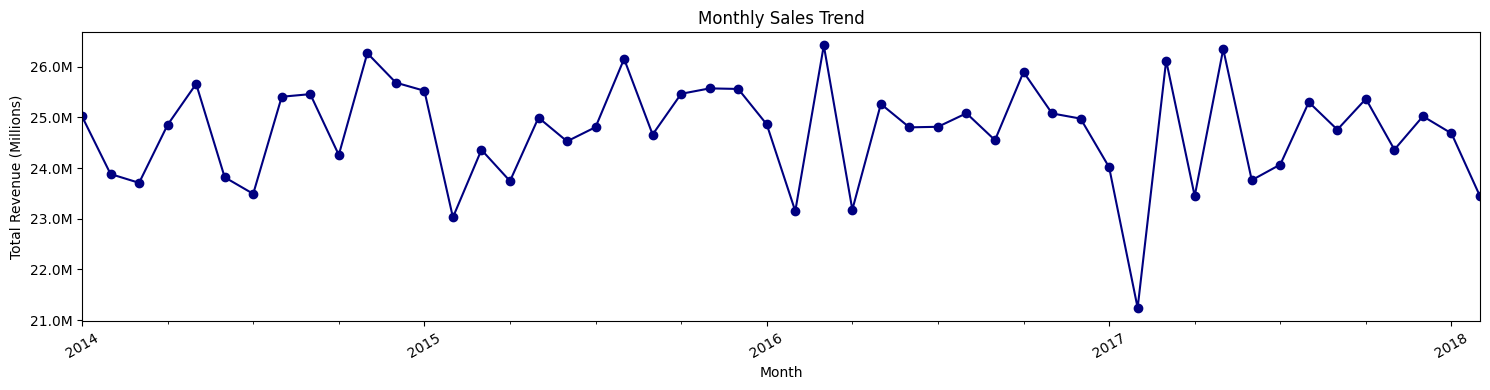

In [72]:
df['order_month'] = df['order_date'].dt.to_period('M')


monthly_sales = df.groupby('order_month')['revenue'].sum()


plt.figure(figsize=(15,4))

monthly_sales.plot(marker='o', color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

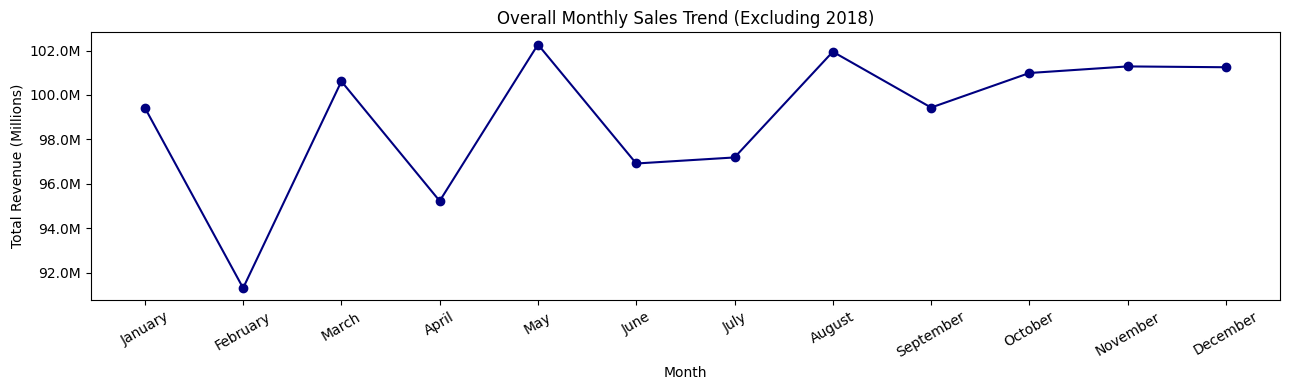

In [73]:
df_ = df[df['order_date'].dt.year != 2018]

monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),
    monthly_sales.values,
    marker='o',
    color='navy')


formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')


plt.xticks(rotation=30
          )

plt.tight_layout()


plt.show()


C:\Users\arish\AppData\Local\Temp\ipykernel_36224\1099498102.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




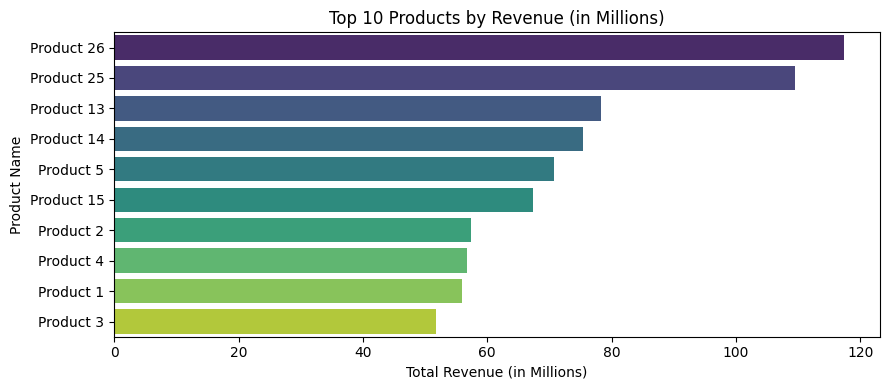

In [74]:
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000


top_prod = top_prod.nlargest(10)


plt.figure(figsize=(9, 4))
sns.barplot(
    x=top_prod.values,
    y=top_prod.index,
    palette='viridis'
)


plt.title('Top 10 Products by Revenue (in Millions)')
plt.xlabel('Total Revenue (in Millions)')
plt.ylabel('Product Name')


plt.tight_layout()


plt.show()

C:\Users\arish\AppData\Local\Temp\ipykernel_36224\3646487647.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




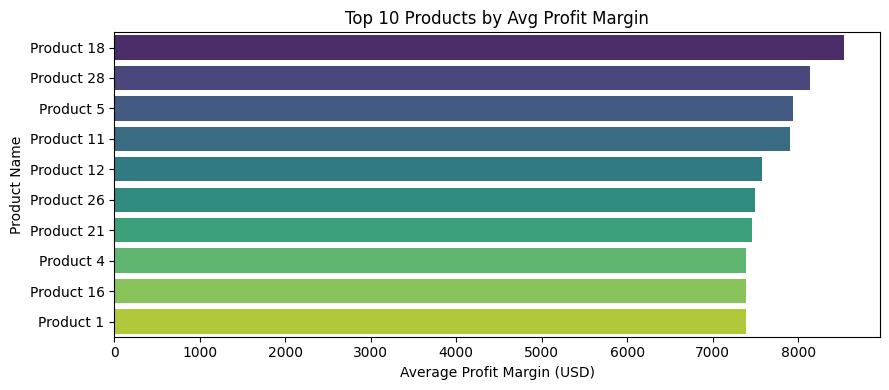

In [75]:
#  Calculating average profit per product
top_margin = (
    df.groupby('product_name')['profit']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)


plt.figure(figsize=(9, 4))


sns.barplot(
    x=top_margin.values,
    y=top_margin.index,
    palette='viridis'
)


plt.title('Top 10 Products by Avg Profit Margin')
plt.xlabel('Average Profit Margin (USD)')
plt.ylabel('Product Name')


plt.tight_layout()
plt.show()

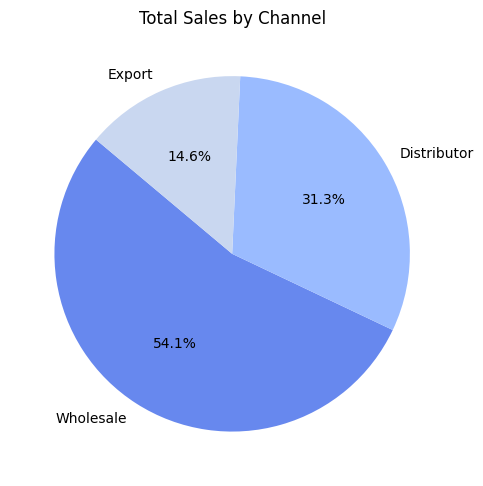

In [76]:
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)


plt.figure(figsize=(5, 5))

# Ploting pie chart with percentage labels and a defined start angle
plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm')
)


plt.title('Total Sales by Channel')


plt.tight_layout()

plt.show()

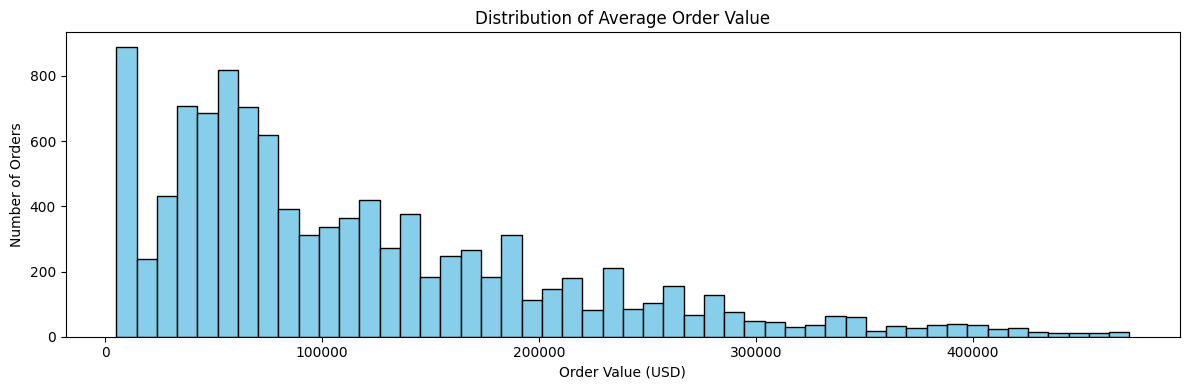

In [77]:
# Calculating the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()


plt.figure(figsize=(12, 4))


plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)


plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()

plt.show()

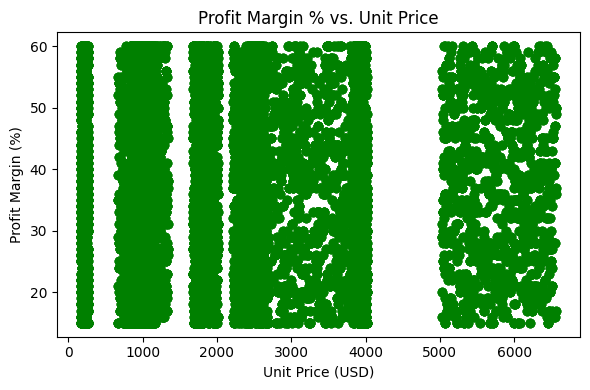

In [78]:
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

plt.figure(figsize=(6,4))

# Ploting unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],
    df['profit_margin_pct'],
    alpha=0.6,
    color='green'
)


plt.title('Profit Margin % vs. Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin (%)')


plt.tight_layout()


plt.show()

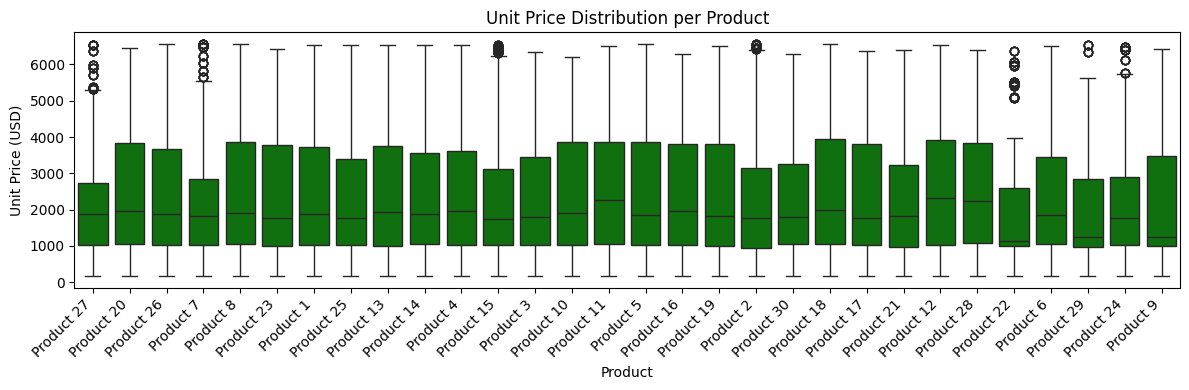

In [79]:
plt.figure(figsize=(12,4))

# Creating a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    color='g'
)

plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')
plt.ylabel('Unit Price (USD)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

C:\Users\arish\AppData\Local\Temp\ipykernel_36224\1674766749.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




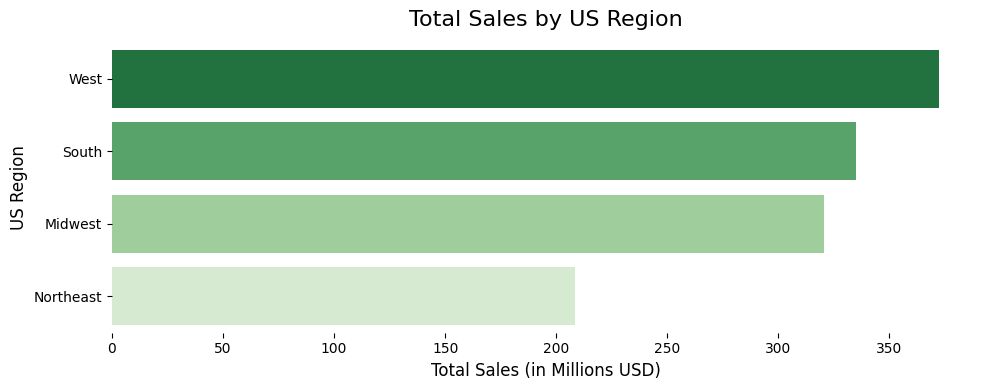

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns


region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)
    / 1e6
)


plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'
)


plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


In [81]:
import plotly.express as px

#  Aggregate revenue by state (in millions)
state_sales = (
    df
    .groupby('state')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6  # convert to millions

#  Plotly choropleth
fig = px.choropleth(
    state_sales,
    locations='state',
    locationmode='USA-states',
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'revenue_m':':.2f'}
)


fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()


C:\Users\arish\AppData\Local\Temp\ipykernel_36224\2111884901.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\arish\AppData\Local\Temp\ipykernel_36224\2111884901.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




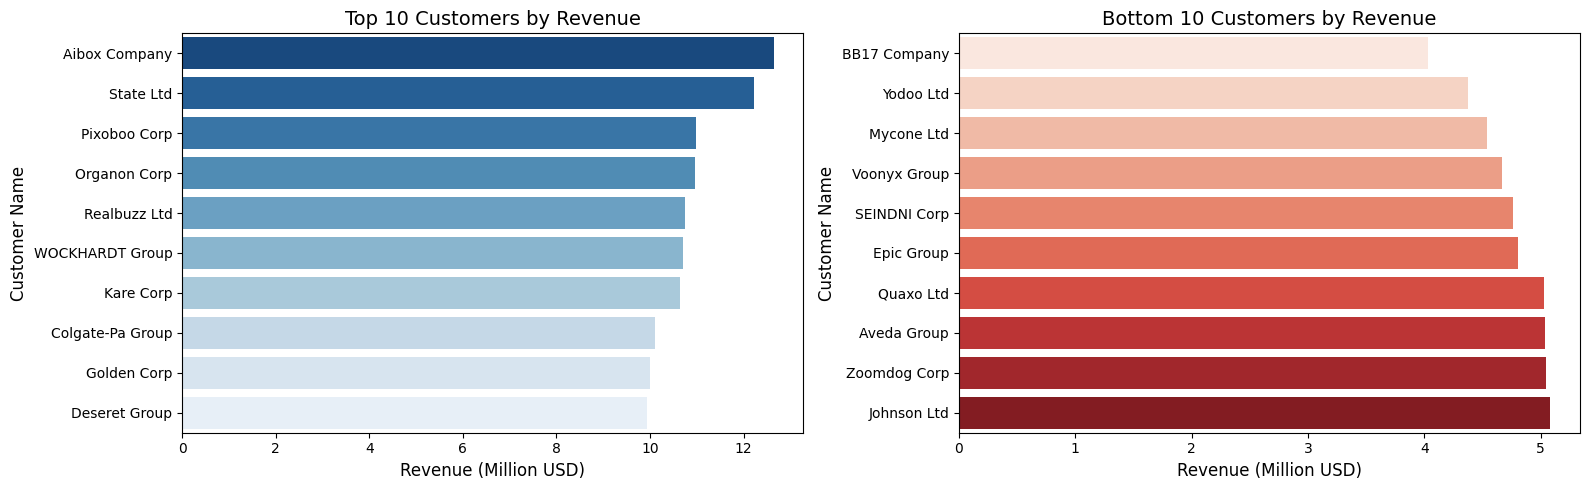

In [82]:
# Calculating total revenue per customer and select top 10
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

#  Calculating total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()
      .sort_values(ascending=True)
      .head(10)
)


fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Top 10 customers by revenue (millions)
sns.barplot(
    x=top_rev.values / 1e6,
    y=top_rev.index,
    palette='Blues_r',
    ax=axes[0]
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[0].set_ylabel('Customer Name', fontsize=12)

# Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6,
    y=bottom_rev.index,
    palette='Reds',
    ax=axes[1]
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[1].set_ylabel('Customer Name', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\arish\AppData\Local\Temp\ipykernel_36224\3238489457.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




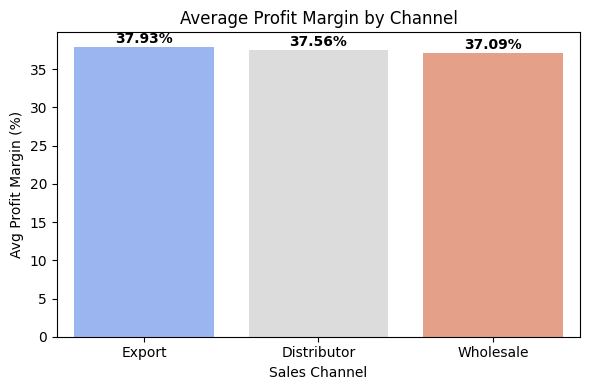

In [83]:
channel_margin = (
    df.groupby('channel')['profit_margin_pct']
      .mean()
      .sort_values(ascending=False)
)


plt.figure(figsize=(6, 4))

ax = sns.barplot(
    x=channel_margin.index,
    y=channel_margin.values,
    palette='coolwarm'
)


plt.title('Average Profit Margin by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Avg Profit Margin (%)')


for i, v in enumerate(channel_margin.values):
    ax.text(
        i,
        v + 0.5,
        f"{v:.2f}%",
        ha='center',
        fontweight='bold'
    )


plt.tight_layout()
plt.show()

C:\Users\arish\AppData\Local\Temp\ipykernel_36224\1938825656.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




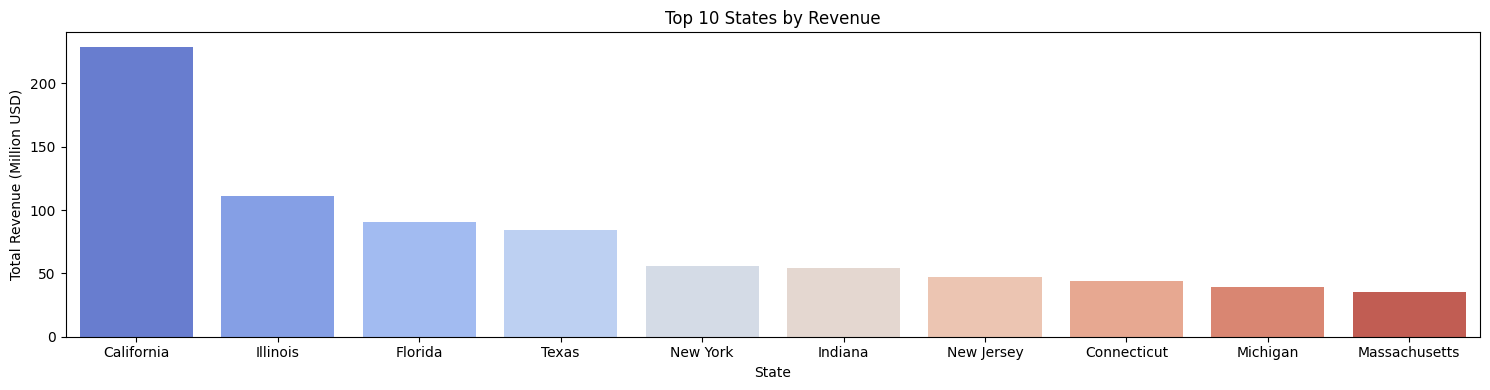

C:\Users\arish\AppData\Local\Temp\ipykernel_36224\1938825656.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




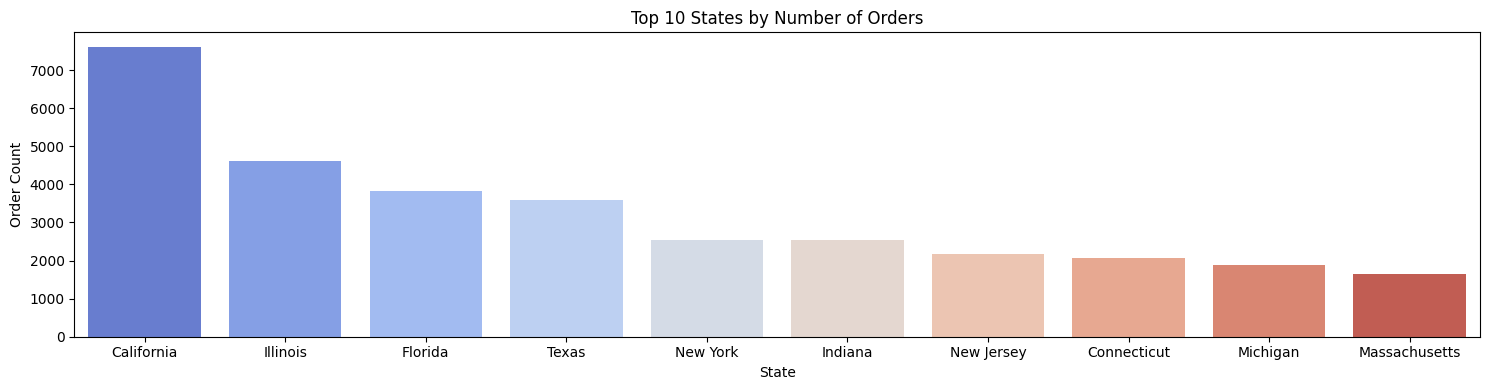

In [84]:
# total revenue and unique order count per state
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),
    orders=('order_number', 'nunique')
).sort_values('revenue', ascending=False).head(10)

#  Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['revenue'] / 1e6,
    palette='coolwarm'
)
plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue (Million USD)')
plt.tight_layout()
plt.show()

# Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['orders'],
    palette='coolwarm'
)
plt.title('Top 10 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

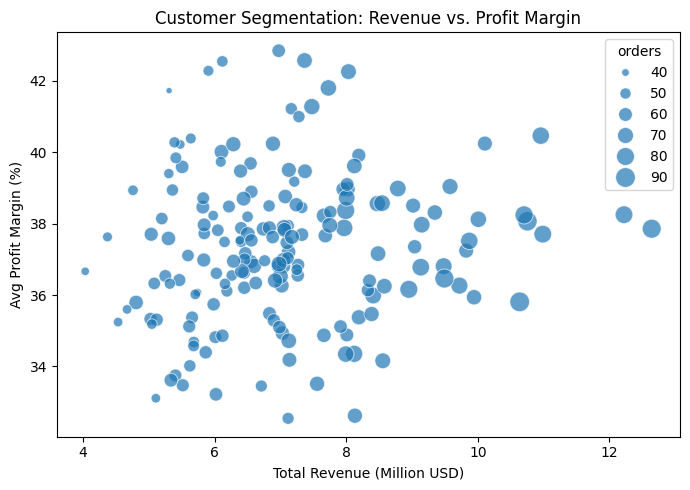

In [85]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()


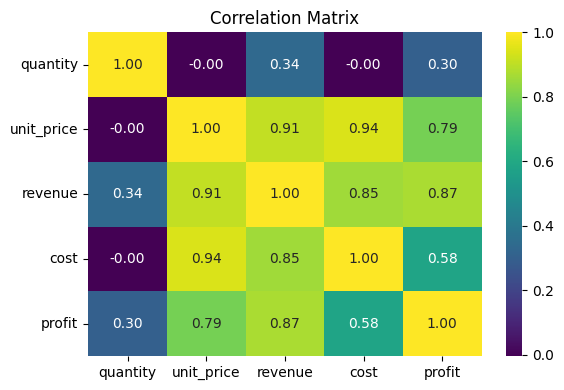

In [86]:
#  numeric columns to include in the correlation calculation
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculating the correlation matrix for these numeric features
corr = df[num_cols].corr()


plt.figure(figsize=(6,4))


sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='viridis'
)


plt.title('Correlation Matrix')


plt.tight_layout()


plt.show()

In [87]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num,order_month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1,2014-01
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1,2014-01
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1,2014-01
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1,2014-01
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2,2018-02
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2,2018-02
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2,2018-02
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2,2018-02


In [88]:
# Export Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)